# <span style="font-width:bold; font-size: 3rem; color:#1EB182;"><img src="https://github.com/logicalclocks/hopsworks-tutorials/blob/master/images/icon102.png?raw=1" width="38px"></img> **Hopsworks Feature Store** </span><span style="font-width:bold; font-size: 3rem; color:#333;">- Part 04: Batch Predictions</span>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/logicalclocks/hopsworks-tutorials/blob/master/advanced_tutorials/air_quality/4_model_training.ipynb)


## 🗒️ This notebook is divided into the following sections:

1. Loading the training data
2. Train the model
3. Register model in Hopsworks model registry

![part3](https://github.com/logicalclocks/hopsworks-tutorials/blob/master/images/03_model.png?raw=1) 

In [ ]:
#Tu2zX9RyFTZeUOwU.IOcY6cDThDeEmpgIAMtnJWuBNcLkElzGJnSrQe0T82xfxZ83uYNCfWnsKqt5vgaP
# !pip install -U hopsworks --quiet

### <span style='color:#ff5f27'> 📝 Imports

In [4]:
import pandas as pd

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")

In [7]:
!pip install -U hopsworks --quiet

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.6/120.6 KB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 KB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 KB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 68.6 MB/s eta 0:00

---

## <span style="color:#ff5f27;"> 📡 Connecting to Hopsworks Feature Store </span>

In [8]:
import hopsworks

project = hopsworks.login() 

fs = project.get_feature_store() 

Copy your Api Key (first register/login): https://c.app.hopsworks.ai/account/api/generated

Paste it here: ··········
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/7374
Connected. Call `.close()` to terminate connection gracefully.


---

## <span style="color:#ff5f27;">🪝 Feature View and Training Dataset Retrieval</span>

In [47]:
feature_view = fs.get_feature_view(
    name = 'air_quality_fv',
    version = 1
)

In [48]:
train_data = feature_view.get_training_data(1)[0]
train_data.head()

,date,pm25,pm10,o3,city,tempmax,tempmin,temp,feelslikemax,feelslikemin,...,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,conditions
0,1613343600000,-0.826166,-0.360792,-0.256318,0,-1.123818,-1.247714,-1.109384,-1.259736,-1.128748,...,-0.176381,0.358670,0.504977,0.661104,0.130702,-1.043489,1.047915,-0.125066,-0.129644,5
1,1625090400000,-0.764230,-0.560531,1.577337,0,0.914459,0.961891,0.863655,1.047075,0.954436,...,-0.176381,1.653917,2.178873,0.060400,-0.303836,1.240982,0.235366,-1.074605,-1.089864,1
2,1640559600000,-0.082941,0.098610,-1.246492,0,-1.035197,-1.672638,-1.516379,-1.008655,-1.623316,...,-0.176381,-0.907793,-0.834139,0.739900,0.428153,-1.188478,0.113484,-0.882564,-0.884103,5
3,1657058400000,-1.156488,-0.540557,1.614010,0,1.003079,1.378317,1.164477,1.149077,1.321616,...,-0.176381,-0.159428,-0.499360,-1.519229,-0.347807,0.264954,0.357249,1.090011,1.104926,1
4,1659218400000,-0.371973,0.058662,1.870722,0,1.268942,1.522791,1.394518,1.619855,1.449005,...,-0.176381,-0.936576,-0.834139,-0.450384,-0.254692,-0.067461,-0.170908,1.207370,1.200948,0


---

## <span style="color:#ff5f27;">🧬 Modeling</span>

In [49]:
train_data = train_data.sort_values(by=["date", 'city'], ascending=[False, True]).reset_index(drop=True)
# train_data["aqi_next_day"] = train_data.groupby('city')['aqi'].shift(1)

train_data.head(5)

,date,pm25,pm10,o3,city,tempmax,tempmin,temp,feelslikemax,feelslikemin,...,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,conditions
0,1673996400000,1.073187,0.118584,-1.466530,0,-1.611232,-1.672638,-1.507531,-1.510818,-1.540888,...,-0.176381,-0.627156,-1.131721,0.464578,0.247096,-1.188478,3.769953,-0.817364,-0.815516,5
1,1673650800000,-1.528100,-1.039906,-1.503203,0,-1.832783,-1.162729,-1.525226,-1.989442,-1.450967,...,-0.176381,1.653917,0.839756,1.370269,0.503162,1.244518,1.251052,-1.172997,-1.158452,0
2,1673564400000,1.217703,-0.820193,-0.549703,0,-1.097232,-0.720808,-0.932430,-1.118503,-0.993865,...,-0.176381,1.135818,0.504977,1.575138,0.110009,1.580470,-1.267849,-1.496623,-1.501388,0
3,1673478000000,1.733831,0.318323,-0.586376,0,-1.363094,-0.482851,-0.976668,-1.204812,-0.626685,...,-0.176381,-1.325150,-0.499360,1.463897,0.022067,0.869667,-1.064711,-1.770460,-1.775736,4
4,1673391600000,1.506735,1.297048,-1.429857,0,-1.389680,-1.247714,-1.286338,-1.228351,-0.993865,...,-0.176381,-0.677527,-1.168918,-1.452484,0.169500,1.166719,-0.170908,-1.199077,-1.199604,0


In [50]:
X = train_data.drop(columns=["date","city","o3","pm25","conditions"]).fillna(0)
y = X.pop("pm10")

In [51]:
X

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy
0,-1.611232,-1.672638,-1.507531,-1.510818,-1.540888,-1.365160,-1.366509,-0.733611,-0.221540,-0.409073,-0.092503,-0.176381,-0.627156,-1.131721,0.464578,0.247096,-1.188478,3.769953,-0.817364,-0.815516
1,-1.832783,-1.162729,-1.525226,-1.989442,-1.450967,-1.819737,-1.675511,-1.451343,-0.221540,-0.409073,-0.092503,-0.176381,1.653917,0.839756,1.370269,0.503162,1.244518,1.251052,-1.172997,-1.158452
2,-1.097232,-0.720808,-0.932430,-1.118503,-0.993865,-1.051659,-0.425128,0.681776,-0.221540,-0.409073,-0.092503,-0.176381,1.135818,0.504977,1.575138,0.110009,1.580470,-1.267849,-1.496623,-1.501388
3,-1.363094,-0.482851,-0.976668,-1.204812,-0.626685,-0.981122,-0.604781,0.194923,-0.144904,1.477079,-0.092503,-0.176381,-1.325150,-0.499360,1.463897,0.022067,0.869667,-1.064711,-1.770460,-1.775736
4,-1.389680,-1.247714,-1.286338,-1.228351,-0.993865,-1.130035,-0.870667,0.099560,-0.221540,-0.409073,-0.092503,-0.176381,-0.677527,-1.168918,-1.452484,0.169500,1.166719,-0.170908,-1.199077,-1.199604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,-1.832783,-1.842608,-1.781810,-1.934518,-1.698251,-1.851087,-1.905467,-1.506553,-0.221540,-0.409073,-0.092503,-0.176381,1.135818,0.504977,1.139442,0.534201,-1.188478,1.129170,-0.824477,-0.829233
741,-1.744163,-1.502668,-1.640246,-1.942364,-1.645797,-1.741362,-1.618022,-1.089968,-0.221540,-0.409073,-0.092503,-0.176381,0.876769,0.839756,1.327626,0.482470,-0.184160,0.844778,-0.882564,-0.897820
742,-1.823921,-1.502668,-1.675637,-1.699129,-1.645797,-1.639474,-1.589278,-1.084949,-0.221540,-0.409073,-0.092503,-0.176381,-1.195626,-0.499360,-1.409841,0.495403,0.190691,1.088543,-1.074605,-1.062430
743,-1.566921,-1.757623,-1.640246,-1.385277,-1.503421,-1.561098,-1.079064,0.300324,-0.221540,-0.409073,-0.092503,-0.176381,-1.195626,-0.164581,-1.496981,0.415220,-0.382194,-0.130280,-1.162328,-1.172169


MAE: 0.23
   pm10_real  pm10_pred
0   1.297048   0.495764
1   0.597959   0.402041
2   0.198480   0.423889
3  -0.340818   0.029526
4   0.138558   0.132137
5   0.298349  -0.125022


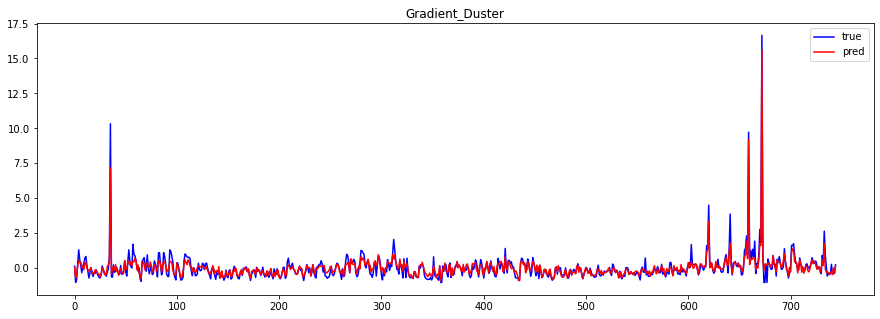

  0%|          | 0/6 [00:00<?, ?it/s]

Model created, explore it at https://c.app.hopsworks.ai:443/p/7374/models/Gradient_Duster/4


In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
from hsml.schema import Schema
from hsml.model_schema import ModelSchema
import joblib


model_names = ["Gradient_Duster"]

gb = GradientBoostingRegressor()
models = [gb]
models_trained = {m: None for m in model_names}

for i, model in enumerate(models):
    model.fit(X, y)
    mae = mean_absolute_error(y, model.predict(X))
    print("MAE: {:.2f}".format(mae))
    
    pred_df = pd.DataFrame({
    'pm10_real': y.iloc[4:10].values,
    'pm10_pred': model.predict(X.iloc[4:10])
    }
    )
    print(pred_df)
    fig = plt.figure(figsize=(15,5))
    plt.plot(y, label='true', c='b')
    plt.plot(model.predict(X), label='pred', c='r')
    plt.legend()
    plt.title(model_names[i])
    plt.show()
    
    models_trained[model_names[i]] = model
    model_name = model_names[i]
    
    input_schema = Schema(X)
    output_schema = Schema(y)
    model_schema = ModelSchema(input_schema=input_schema, output_schema=output_schema)
    
    joblib.dump(model, f'{model_name}.pkl')

    model = mr.sklearn.create_model(
        name=model_name,
        metrics={"mae": mae},
        description=f"{model_name} with default sklearn parameters",
        input_example=X.sample().to_numpy(),
        model_schema=model_schema
    )

    model.save(f'{model_name}.pkl')

### **Prediction**

In [53]:
import joblib

In [24]:
joblib.__version__

'1.2.0'

In [54]:
#Get model
mr = project.get_model_registry()
model = mr.get_model("Gradient_Duster", version=2)
model_dir = model.download()
model = joblib.load(model_dir + "/Gradient_Duster.pkl")
print(model)
#/Projects/hannah_1213/Models/Gradient_Duster/1/Gradient_Duster.pkl
    #Create predictions
    # preds = model.predict(weather_df)
    # print(preds)

Connected. Call `.close()` to terminate connection gracefully.


In [25]:
from google.colab import drive
drive.mount('/content/gdrive')	
import os
os.chdir('/content/gdrive/MyDrive/air_quality')

Mounted at /content/gdrive


In [28]:
!pip install python-dotenv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
#@title

def get_weather_json(city, date, WEATHER_API_KEY):
    print(city,date,WEATHER_API_KEY)
    return requests.get(f'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{city.lower()}/{date}?unitGroup=metric&include=days&key={WEATHER_API_KEY}&contentType=json').json()


def get_weather_data(city_name, date):
    WEATHER_API_KEY = os.getenv('WEATHER_API_KEY')
    json = get_weather_json(city_name, date, WEATHER_API_KEY)
    
    data = json['days'][0]

    return [
        json['address'].capitalize(),
        data['datetime'],
        data['tempmax'],
        data['tempmin'],
        data['temp'],
        data['feelslikemax'],
        data['feelslikemin'],
        data['feelslike'],
        data['dew'],
        data['humidity'],
        data['precip'],
        data['precipprob'],
        data['precipcover'],
        data['snow'],
        data['snowdepth'],
        data['windgust'],
        data['windspeed'],
        data['winddir'],
        data['pressure'],
        data['cloudcover'],
        data['visibility'],
        data['solarradiation'],
        data['solarenergy'],
        data['uvindex'],
        data['conditions']
    ]


def get_weather(data):
    col_names = [
        'city',
        'date',
        'tempmax',
        'tempmin',
        'temp',
        'feelslikemax',
        'feelslikemin',
        'feelslike',
        'dew',
        'humidity',
        'precip',
        'precipprob',
        'precipcover',
        'snow',
        'snowdepth',
        'windgust',
        'windspeed',
        'winddir',
        'pressure',
        'cloudcover',
        'visibility',
        'solarradiation',
        'solarenergy',
        'uvindex',
        'conditions'
    ]

    new_data = pd.DataFrame(
        data,
        columns=col_names
    )
    new_data.date = new_data.date.apply(timestamp_2_time_weather)

    return new_data
def timestamp_2_time_weather(x):
    dt_obj = datetime.strptime(str(x), '%Y-%m-%d')
    dt_obj = dt_obj.timestamp() * 1000
    return int(dt_obj)

In [58]:
from datetime import timedelta, datetime
import hopsworks
import joblib
from functions import *
os.environ['AIR_QUALITY_API_KEY'] = '2af710d5722e03e360f0705e26797ca3027a7bbe'
os.environ['WEATHER_API_KEY'] =  'X3347MZK4ULFFF3PK4MRLVKKY'
#Connect to hopsworks and get feature store
project = hopsworks.login()
fs = project.get_feature_store()
print(datetime.now().strftime("%Y-%m-%d"))
#Function for the app
def predict_weather(location):

    #Get future weather data
    weather_data1 = get_weather([get_weather_data(location, (datetime.now() + timedelta(days=1)).strftime("%Y-%m-%d"))])
    weather_data2 = get_weather([get_weather_data(location, (datetime.now() + timedelta(days=2)).strftime("%Y-%m-%d"))])
    weather_data3 = get_weather([get_weather_data(location, (datetime.now() + timedelta(days=3)).strftime("%Y-%m-%d"))])
    weather_data4 = get_weather([get_weather_data(location, (datetime.now() + timedelta(days=4)).strftime("%Y-%m-%d"))])
    weather_data5 = get_weather([get_weather_data(location, (datetime.now() + timedelta(days=5)).strftime("%Y-%m-%d"))])
    weather_data6 = get_weather([get_weather_data(location, (datetime.now() + timedelta(days=6)).strftime("%Y-%m-%d"))])
    weather_data7 = get_weather([get_weather_data(location, (datetime.now() + timedelta(days=7)).strftime("%Y-%m-%d"))])

    weather_df = pd.concat([weather_data1, weather_data2, weather_data3, weather_data4, weather_data5, weather_data6, weather_data7], axis=0)

    weather_df = weather_df.drop(columns=["precipprob", "uvindex", "date","city","conditions"]).fillna(0)
    weather_df.rename(
        columns={"pressure": "sealevelpressure"}, inplace=True)
    print(weather_df)

    #Get model
    mr = project.get_model_registry()
    model = mr.get_model("Gradient_Duster", version=2)
    model_dir = model.download()
    model = joblib.load(model_dir + "/Gradient_Duster.pkl")
    print("model")

    #Create predictions
    preds = model.predict(weather_df)
    print(preds)

    list_of_predictions = []
    for x in range(7):
      list_of_predictions.append("pm10 on " + (datetime.now() + timedelta(days=x+1)).strftime('%Y-%m-%d') + ": " +  str(preds[x]))

    return list_of_predictions

predict_weather("Beijing")

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/7374
Connected. Call `.close()` to terminate connection gracefully.
2023-01-18
   tempmax  tempmin  temp  feelslikemax  feelslikemin  feelslike   dew  \
0      2.0     -9.0  -1.8          -3.3         -10.0       -6.0 -18.3   
0     -2.6     -8.0  -5.3          -6.1         -14.3      -10.1 -26.1   
0      0.5     -7.7  -3.9           0.5         -11.5       -5.8 -22.8   
0      3.3     -5.8  -2.2           0.6          -8.2       -4.1 -17.8   
0     -3.2     -8.0  -6.1          -8.0         -15.1      -10.5 -15.1   
0     -4.9    -11.7  -8.5          -9.6         -19.7      -14.6 -29.0   
0     -4.8    -10.7  -7.8          -4.8         -14.4       -9.1 -25.4   

   humidity  precip  precipcover  snow  snowdepth  windgust  windspeed  \
0      29.4     0.0         0.00   0.0        0.0      51.5       29.9   
0      18.0     0.0       

['pm10 on 2023-01-19: -0.05227929494640057',
 'pm10 on 2023-01-20: -0.2641723913577707',
 'pm10 on 2023-01-21: 0.052025984284337634',
 'pm10 on 2023-01-22: 0.10965420501857173',
 'pm10 on 2023-01-23: -0.4991318207841015',
 'pm10 on 2023-01-24: -0.323793530410512',
 'pm10 on 2023-01-25: -0.42666762959304244']

In [64]:
import gradio as gr
demo = gr.Interface(
    fn=predict_weather,
    title="Future air quality predictor",
    description="Input the name of a location below to get future air quality predictions for that location",
    allow_flagging="never",
    inputs="text",
    outputs="text"
)

demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>